<a href="https://colab.research.google.com/github/MYElmasry/Hand-Gesture-Recognition/blob/main/Hand_Gesture_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Used Libraries**

In [122]:
from matplotlib import pyplot
from matplotlib.image import imread
import numpy as np
import pandas as pd
import os
import shutil
from random import seed
from random import random
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import KElbowVisualizer
from sklearn.neighbors import NearestNeighbors

# **Preprocessing**

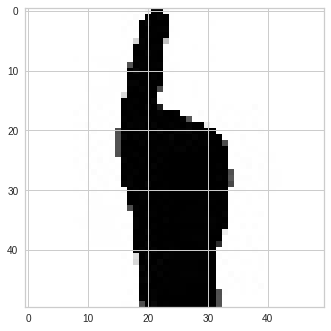

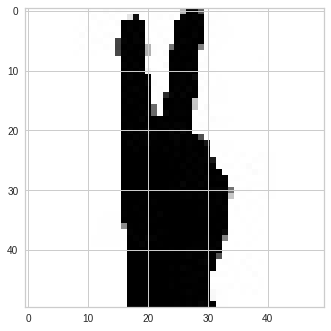

In [2]:
# plot photos
# define location of dataset
folder = '/content/drive/MyDrive/Hand Dataset/'
for i in range(1,3):
  filename = folder + str(i) +'/'+ str(901) + '.jpg'
  image = imread(filename)
  pyplot.imshow(image)
  pyplot.show()

In [ ]:
# Rename Files
# 1
path = '/content/drive/MyDrive/Hand Dataset/1/'
for filename in os.listdir(path):
  my_source = path + filename
  my_dest = path + "1." + filename
  os.rename(my_source, my_dest)
path = '/content/drive/MyDrive/Hand Dataset/2/'
for filename in os.listdir(path):
  my_source = path + filename
  my_dest = path + "2." + filename
  os.rename(my_source, my_dest)

In [ ]:
# combine folders
allData = '/content/drive/MyDrive/allData/'
os.mkdir(allData)
path = '/content/drive/MyDrive/Hand Dataset/1/'
for filename in os.listdir(path):
  shutil.move(path + filename, allData + filename)
path = '/content/drive/MyDrive/Hand Dataset/2/'
for filename in os.listdir(path):
  shutil.move(path + filename, allData + filename)

In [ ]:
dataset_home = '/content/drive/MyDrive/Hand_Dataset/'
subdirs = ['train/', 'test/']
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['1/', '2/']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        os.makedirs(newdir, exist_ok=True)
        
# seed random number generator
seed(1)
# define ratio of pictures to use for validation
val_ratio = 0.25
src_directory = '/content/drive/MyDrive/allData/'
for file in os.listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    if random() < val_ratio:
        dst_dir = 'test/'
    if file.startswith('1'):
        dst = dataset_home + dst_dir + '1/' + file
        shutil.copyfile(src, dst)
    elif file.startswith('2'):
        dst = dataset_home + dst_dir + '2/' + file
        shutil.copyfile(src, dst)

In [3]:
trainList1, trainList2, testList1, testList2 = [], [], [], []
dataset_home = '/content/drive/MyDrive/Hand_Dataset/'
subdirs = ['train/', 'test/']
classdirs = ['1/', '2/']
for subdir in subdirs:
  for classdir in classdirs:
    for file in os.listdir(dataset_home + subdir + classdir):
      if subdir == 'train/' and classdir == '1/':
        trainList1.append(imread(dataset_home + subdir + classdir + file).flatten())
      elif subdir == 'train/' and classdir == '2/':
        trainList2.append(imread(dataset_home + subdir + classdir + file).flatten())
      elif subdir == 'test/' and classdir == '1/':
        testList1.append(imread(dataset_home + subdir + classdir + file).flatten())
      elif subdir == 'test/' and classdir == '2/':
        testList2.append(imread(dataset_home + subdir + classdir + file).flatten())

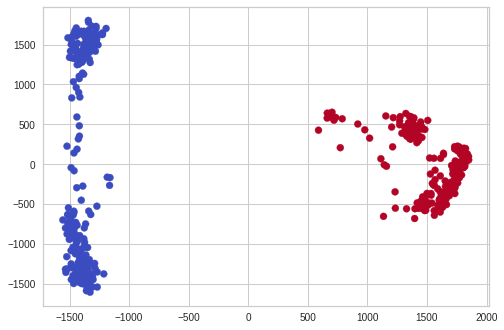

In [109]:
y_train = []
for i in range(len(trainList1)):
  y_train.append(1)
for i in range(len(trainList2)):
  y_train.append(2)

x_train = trainList1 + trainList2
pca  = PCA(n_components=2)
converted_x_train = pca.fit_transform(x_train)
pyplot.scatter(converted_x_train[:,0],converted_x_train[:,1], c=y_train, cmap="coolwarm")
pyplot.show()

# **Classification**

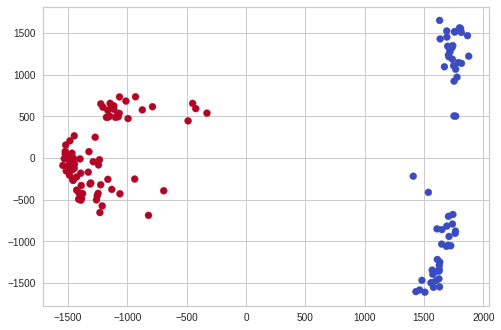

In [64]:
y_test = []
for i in range(len(testList1)):
  y_test.append(1)
for i in range(len(testList2)):
  y_test.append(2)

x_test = testList1 + testList2
pca  = PCA(n_components=2)
converted_x_test = pca.fit_transform(x_test)
pyplot.scatter(converted_x_test[:,0],converted_x_test[:,1], c=y_test, cmap="coolwarm")
pyplot.show()

In [65]:
df = pd.DataFrame(data=converted_x_train, columns=['x', 'y'])
df['target'] = y_train
df.head()

,x,y,target
0,-1535.030946,-800.179557,1
1,-1486.765214,-704.295449,1
2,-1328.271489,-1605.229320,1
3,-1417.262063,-1482.542144,1
4,-1490.406118,-843.676957,1


In [66]:
df_test = pd.DataFrame(data=converted_x_test, columns=['x', 'y'])
df_test['target'] = y_test
df_test.head()

,x,y,target
0,1651.878747,-859.079695,1
1,1591.382963,-1363.328580,1
2,1707.200303,-700.498489,1
3,1575.052904,-1395.018883,1
4,1726.573524,-1052.874665,1


## **KNN**

In [123]:
k = [3,5,7]
for i in k:
  knn = KNeighborsClassifier(n_neighbors= i)
  knn.fit(converted_x_train, y_train)
  predicted = knn.predict(converted_x_test)
  for j in range(len(predicted)):
    if   predicted[j] == 1:
      predicted[j] = 2
    else:
      predicted[j] = 1
  print("Accuracy when K =",i,"equal",round(accuracy_score(predicted, y_test)*100, 2),'%')


Accuracy when K = 35 equal 100.0 %
Accuracy when K = 3 equal 99.3 %
Accuracy when K = 5 equal 99.3 %
Accuracy when K = 7 equal 99.3 %


## **SVM**

In [106]:
C = [0.001, 0.01, 1, 2]
for i in C:
  clf = svm.SVC(C= i, kernel='linear')
  clf.fit(converted_x_train, y_train)
  predicted = knn.predict(converted_x_test)
  for j in range(len(predicted)):
    if   predicted[j] == 1:
      predicted[j] = 2
    else:
      predicted[j] = 1
  print("Accuracy when C =",i,"equal",round(accuracy_score(predicted, y_test)*100, 2),'%')

Accuracy when C = 0.001 equal 99.3 %
Accuracy when C = 0.01 equal 99.3 %
Accuracy when C = 1 equal 99.3 %
Accuracy when C = 2 equal 99.3 %


# **Clustering**

## **KMeans**

In [85]:
#apply kmeans
kmeans = KMeans(n_clusters=2)
results = kmeans.fit_predict(converted_x_train)

In [86]:
#cluster centers of kmeans
clusters = kmeans.cluster_centers_
clusters

array([[-1394.53706665,    -9.67376524],
       [ 1528.87320609,    10.6056417 ]])

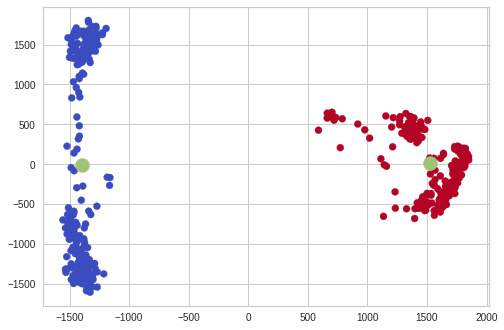

In [87]:
pyplot.scatter(converted_x_train[:,0], converted_x_train[:,1], c=results, cmap="coolwarm")
pyplot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'g')
pyplot.show()

In [90]:
labels = kmeans.labels_
print("Accuracy of KMeans =", round(accuracy_score(labels, y_train)*100, 2),'%')

Accuracy of KMeans = 100.0 %


# **DBSCAN**

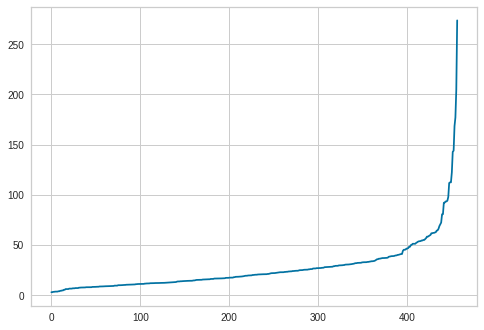

In [93]:
neighbors = NearestNeighbors(n_neighbors=4)
neighbors_fit = neighbors.fit(converted_x_train)
distances, indices = neighbors_fit.kneighbors(converted_x_train)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
pyplot.plot(distances)

In [102]:
dbscan = DBSCAN(eps=300, min_samples=4)
dbscan.fit(converted_x_train)

DBSCAN(eps=300, min_samples=4)

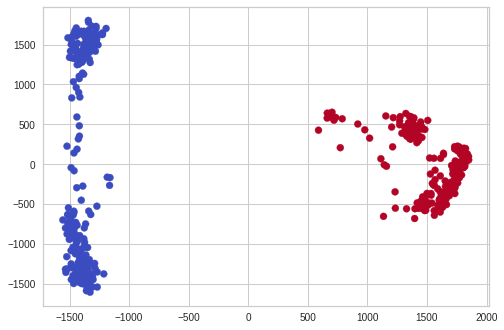

In [103]:
pyplot.scatter(converted_x_train[:,0],converted_x_train[:,1], c=dbscan.labels_, cmap="coolwarm")
pyplot.show()